In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open("names.txt","r").read().split("\n")
len(words)

32033

In [3]:
chars = sorted(list(set(''.join(words))))
stoi = { s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [182]:
block_size = 3
X, Y = [], []
for w in words:
    # print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [185]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [5]:
C = torch.randn((27,2))

In [6]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [7]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [8]:
#torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]],1)

In [9]:
#torch.cat(torch.unbind(emb, 1), 1)

In [10]:
h = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1 )
# h = emb.view(-1,6) @ W1 + b1 

In [11]:
h.shape

torch.Size([32, 100])

In [12]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [13]:
logits = h @ W2 + b2

In [14]:
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)

In [16]:
prob.shape

torch.Size([32, 27])

In [19]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [27]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(18.9252)

In [20]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
# RESPECTABLE CODE

In [343]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [344]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn((100), generator=g)
W2 = torch.randn((100,27), generator=g)
b2 = torch.randn((27), generator=g)
parameters = [C, W1, b1, W2, b2]


In [345]:
sum(p.nelement() for p in parameters)

3481

In [346]:
for p in parameters:
    p.requires_grad = True

In [347]:
lre = torch.linspace(-3,0,1000)
lrs = 10**lre

In [358]:
lri = []
lossi = []

for _ in range(10000):

    ix = torch.randint(0,X.shape[0], (32,))

    # forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1,6) @ W1 + b1)
    logits = h @ W2 + b2 
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdims=True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits, Y[ix]) # same as the previous three lines

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    lr = 0.01 # lrs[i]
    for p in parameters:
        p.data += -lr * p.grad

    # track stats
    # lri.append(lre[i])
    # lossi.append(loss.item())

print(loss.item())


2.2125449180603027


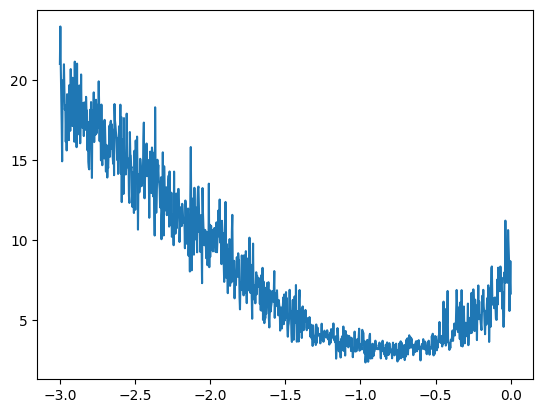

In [349]:
plt.plot(lri, lossi) # ideal learning happens around -1

In [338]:
emb = C[X]
h = torch.tanh(emb.view(-1,6) @W1 + b1)
logits = h @ W2 + b2 
loss = F.cross_entropy(logits, Y)
loss

tensor(2.4967, grad_fn=<NllLossBackward0>)

In [384]:
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(30):

    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1,-1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break

    print(''.join(itos[i] for i in out))
        

mora.
mayah.
seel.
ndheyah.
rethastendrari.
aderedieliigh.
pioen.
edeliestanar.
kayzioh.
kalin.
shubergahimies.
kin.
renelipanterofiu.
zence.
ryy.
jul.
ehs.
kay.
mistolen.
hyl.
salynn.
ufeu.
jelver.
mil.
revis.
jaosten.
adirfen.
meona.
zpeil.
samueh.


In [363]:
C[torch.tensor([context])]

tensor([[[ 0.6257, -0.6505],
         [ 0.6257, -0.6505],
         [ 0.6257, -0.6505]]], grad_fn=<IndexBackward0>)